In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
df = pd.read_csv(r"E:\MNIST Dataset\train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0


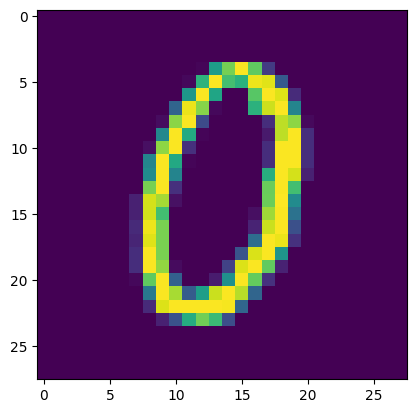

In [232]:
image_sample = np.reshape(df.iloc[5, 1:], (28, 28))
plt.imshow(image_sample)
print(df['label'][5])

In [233]:
data = np.array(df)
print(data.shape)

(42000, 785)


In [234]:
np.random.shuffle(data)
train_data = data[:41000].T
X_train = train_data[1:]
y_train = train_data[0]
dev_data = data[41000:].T
X_dev = dev_data[1: ]
y_dev = dev_data[0]

In [235]:
X_train = X_train / 255.
X_dev = X_dev / 255.

In [236]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [237]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)

In [238]:
def forward_prop(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [239]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max()+1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [240]:
def ReLU_derivative(Z):
    return Z>0

In [241]:
def backprop(Z1, A1, Z2, A2, W2, X, y):
    m = y.size
    one_hot_y = one_hot(y)
    dZ2 = A2 - one_hot_y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_derivative(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [242]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

In [243]:
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions==y)/y.size

In [244]:
def gradient_descent(X, y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print(f'Iteration: {i}, Accuracy: {get_accuracy(get_predictions(A2), y):.2f}')
    return W1, b1, W2, b2

In [245]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.1)

[9 7 5 ... 9 9 9] [3 6 8 ... 0 1 6]
Iteration: 0, Accuracy: 0.11
[2 5 8 ... 8 7 4] [3 6 8 ... 0 1 6]
Iteration: 10, Accuracy: 0.22
[7 3 8 ... 4 7 4] [3 6 8 ... 0 1 6]
Iteration: 20, Accuracy: 0.32
[7 3 8 ... 8 1 4] [3 6 8 ... 0 1 6]
Iteration: 30, Accuracy: 0.39
[7 3 8 ... 8 1 3] [3 6 8 ... 0 1 6]
Iteration: 40, Accuracy: 0.44
[7 3 8 ... 8 1 3] [3 6 8 ... 0 1 6]
Iteration: 50, Accuracy: 0.48
[7 3 8 ... 5 1 3] [3 6 8 ... 0 1 6]
Iteration: 60, Accuracy: 0.51
[7 3 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 70, Accuracy: 0.54
[7 5 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 80, Accuracy: 0.57
[7 5 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 90, Accuracy: 0.61
[7 5 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 100, Accuracy: 0.64
[7 5 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 110, Accuracy: 0.66
[7 6 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 120, Accuracy: 0.68
[7 6 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 130, Accuracy: 0.70
[7 6 8 ... 5 1 6] [3 6 8 ... 0 1 6]
Iteration: 140, Accuracy: 0.72
[9 6 8

In [254]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  3


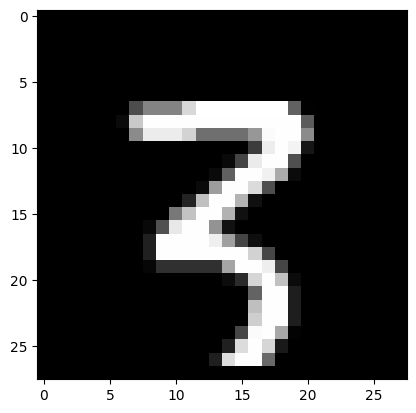

Prediction:  [6]
Label:  6


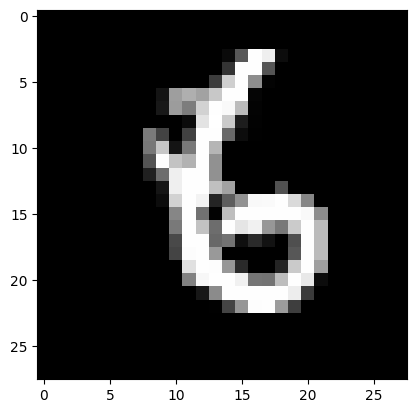

Prediction:  [8]
Label:  8


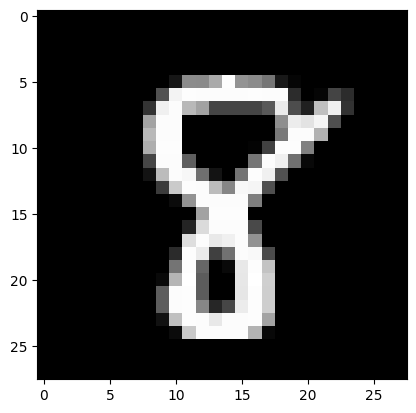

Prediction:  [2]
Label:  2


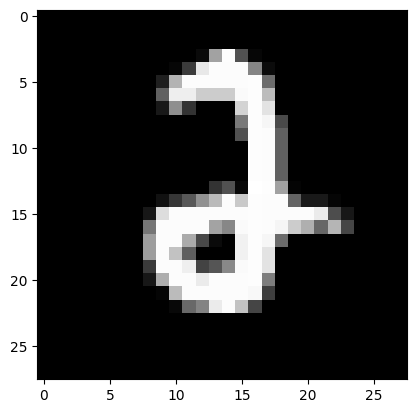

In [255]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)